# Ford GoBike System Data Analysis
## by Mohamed Samy

## Preliminary Wrangling

The dataset represents the bike trips data extracted from GoBike in San Francisco. The data is collected for one month and each row represents a bike trip.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#Load dataset
bike = pd.read_csv('bike.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
print(bike.info())
print(bike.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
#Changing time columns to date time
bike.start_time = bike.start_time.astype(str).str[0:16]
bike.end_time = bike.end_time.astype(str).str[0:16]
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)

In [7]:
#Creating Age column
bike['age'] = 2019-bike.member_birth_year

In [8]:
#Creating Hour and day of week Column
bike['hour']=bike.start_time.dt.hour
bike['dow']=bike.start_time.dt.day_name()

In [9]:
cat_variables = ['start_station_id','start_station_name','end_station_id', 'end_station_name','member_gender','user_type']

In [10]:
for i in cat_variables:
    print(i,bike[i].nunique())

start_station_id 329
start_station_name 329
end_station_id 329
end_station_name 329
member_gender 3
user_type 2


In [11]:
print("Genders: ",bike.member_gender.unique())
print("User Types: ",bike.user_type.unique())

Genders:  ['Male' nan 'Other' 'Female']
User Types:  ['Customer' 'Subscriber']


### What is the structure of your dataset?

the data constitutes of 183412 bike trips from bike share, each record has 16 columns that indicate: the trip date and time, start station name and location, end station name and location, member gender, birth year, gender and type.

The data has 329 stations.<br>
Member Genders: Male, Female and other<br>
User Types: Customer and Subscriber

### What is/are the main feature(s) of interest in your dataset?

I want to explore the factors that affect the bike trip time and explore the factors that motivates people to go on bike trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think gender and user type will help me also the date time columns and I want to explore if the stations cause difference in trip duration.

## Univariate Exploration


### Exploring Duration Column

In [12]:
#Adding duration by minute column to be more friendly in reading the duration
bike['duration_min']=bike.duration_sec/60

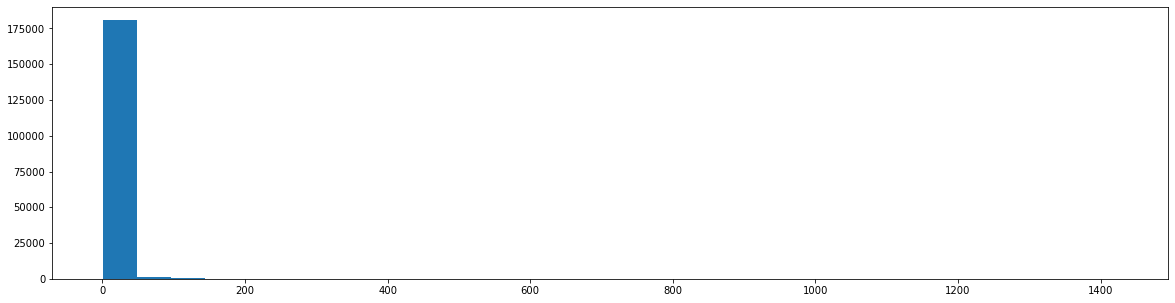

In [13]:
plt.figure(figsize=(20,5))
plt.hist(data=bike,x='duration_min',bins=30);

In [14]:
bike.duration_min.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

it looks like the data has some outliers that i need to investigate

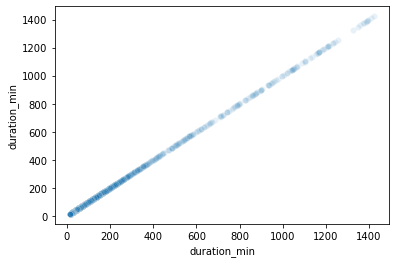

In [15]:
high=bike[bike.duration_min>13]
sb.scatterplot(data=high,x='duration_min',y='duration_min',alpha=0.1)

The are some values grouped around 1400 but I won't deal with them as outliers and will keep them and try to use the log scale

Text(0.5, 0, 'Duration in Minutes')

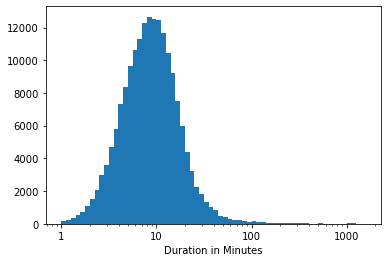

In [16]:
binsize = 0.05
bins = 10 ** np.arange(0,np.log10(bike.duration_min.max())+binsize,binsize)
plt.hist(data=bike,x='duration_min',bins=bins)
plt.xscale("log")
plt.xticks([1,10,100,1000],['1','10','100','1000'])
plt.xlabel("Duration in Minutes")


Using the log scale the distribution looks perfectly normal with very few outliers and the mean is around 10 minutes

### Exploring DateTime Distribution

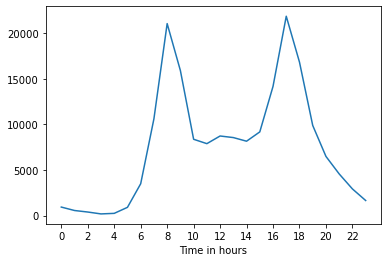

In [17]:
bike.groupby(bike.start_time.dt.hour).duration_sec.count().plot()
plt.xticks(np.arange(0,24,2))
plt.xlabel("Time in hours");

The frequency distribution of time per hours shows that there are two clear peaks at 8 am and 5 pm which suggests that people are using bikes a lot to go and get back from work

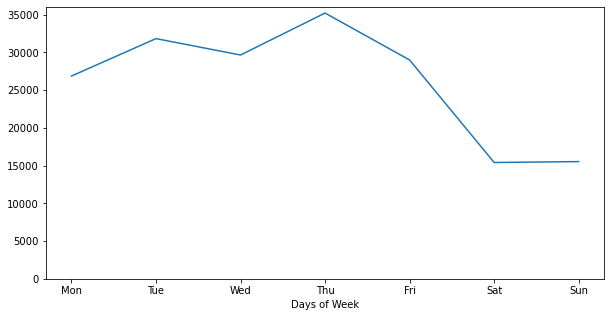

In [18]:
plt.figure(figsize=(10,5))
bike.groupby(bike.start_time.dt.dayofweek).duration_sec.count().plot()
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylim(0,36000)
plt.xlabel("Days of Week");

The day of week requency shows a significant decrease in the number of rides on weekends, wich supports my previous finding that most people use bikes to go to work. In the bivariate segement I'll explore them again but with the duration to check if the people who ride in weekends are more athletic

### Exploring Gender

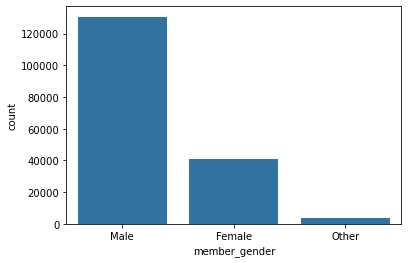

In [19]:
sb.countplot(data=bike,x='member_gender',order=bike.member_gender.value_counts().index,color=sb.color_palette()[0])

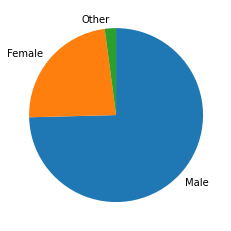

In [20]:
gender_counts=bike.member_gender.value_counts()
plt.pie(gender_counts,labels=gender_counts.index,startangle=90,counterclock=False);

It looks that nearly 75% of the rides are done by Males while 25% are done by Females and Others. It will be interesting to see if that distribution is the same on weekends and workdays or not.

### Exploring User Type

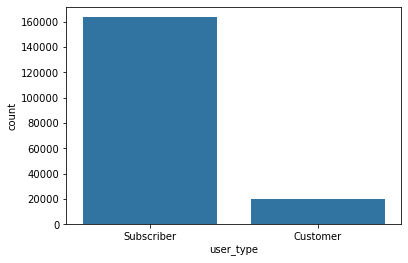

In [21]:
sb.countplot(data=bike,x='user_type',order=bike.user_type.value_counts().index,color=sb.color_palette()[0]);

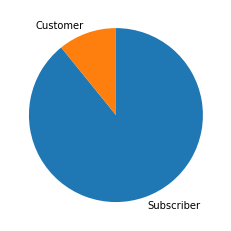

In [22]:
type_counts=bike.user_type.value_counts()
plt.pie(type_counts,labels=type_counts.index,startangle=90,counterclock=False);

Subscibers made 163k rides while customers made 20k rides which means most of the rides are made by subscribers.

### Exploring Age

C:\Users\Muham\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Muham\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


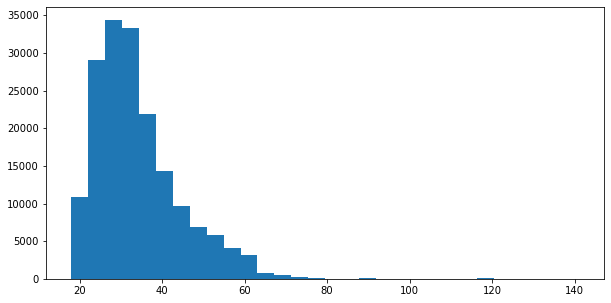

In [23]:
plt.figure(figsize=(10,5))
plt.hist(data=bike,x='age',bins=30);

The age is right skewed and younger people are more common to ride bikes.

In [24]:
bike[bike.age>135]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,hour,dow,duration_min
27370,1474,2019-02-25 09:28:00,2019-02-25 09:53:00,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No,141.0,9,Monday,24.566667


This looks like an outlier and my guess is that the user entered 1878 instead of 1978. So I'll just replace the age for this row in the data with the mean age.

In [25]:
bike['age'][27370]=bike.age.mean()

<ipython-input-25-c7db39efc1e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike['age'][27370]=bike.age.mean()


C:\Users\Muham\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Muham\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


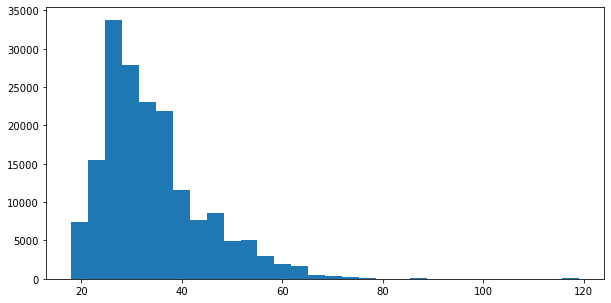

In [26]:
plt.figure(figsize=(10,5))
plt.hist(data=bike,x='age',bins=30);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration columns looked like it has some outliers but after investigation I intended to keep them and used log scale histogram and that showed a symetric normal distibution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I created a new column to change seconds to minutes to make it more readable.<br>
I also changed the start and end date time format from string to datetime to make manipulations easier on this column.<br>
I investigated to check the outliers in the duration time but I found no inconsistencies in the data so I intended not to remove them.<br>
I created age column using birth year to analyze age.

## Bivariate Exploration


### Checking Relationship between datetime and average duration in minutes

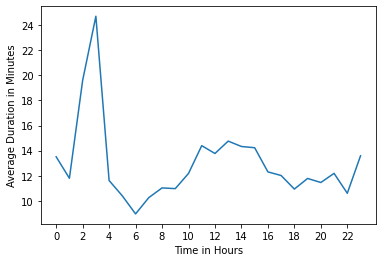

In [27]:
bike.groupby(bike.hour).duration_min.mean().plot()
plt.xticks(np.arange(0,24,2))
plt.xlabel("Time in Hours")
plt.ylabel("Average Duration in Minutes");

I assume that people who ride from 2 to 4 AM are only able to do that only on weekends but let's check this assumption

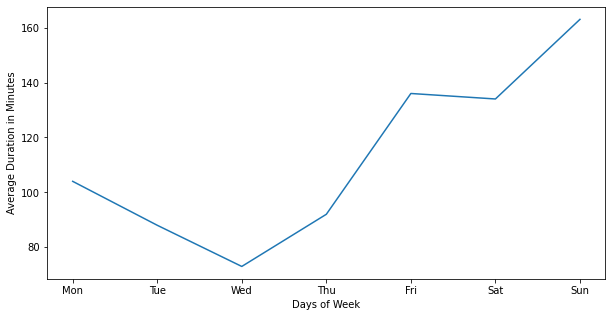

In [28]:
bike24 = bike[(bike.start_time.dt.hour<=4) & (bike.start_time.dt.hour>=2)]
plt.figure(figsize=(10,5))
bike24.groupby(bike24.start_time.dt.dayofweek).duration_min.count().plot()
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
#plt.ylim(0,36000)
plt.xlabel("Days of Week")
plt.ylabel("Average Duration in Minutes");

It looks that mostly this happens in weekends but the overall count is low

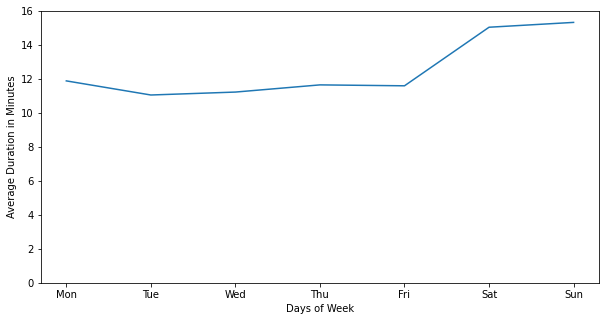

In [29]:
plt.figure(figsize=(10,5))
bike.groupby(bike.start_time.dt.dayofweek).duration_min.mean().plot()
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylim(0,16)
plt.xlabel("Days of Week")
plt.ylabel("Average Duration in Minutes");

From the two charts above it seems that the people who ride in Saturday and Sunday have more time to ride so they ride for more time

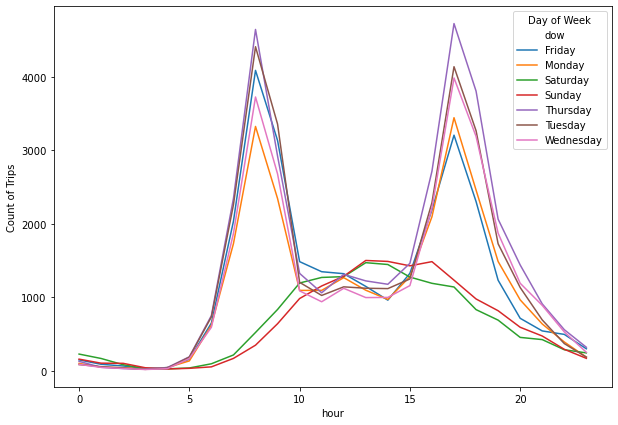

In [30]:
daily_count=bike.groupby(['hour','dow']).duration_min.count()
daily_count = daily_count.reset_index()
daily_count = daily_count.sort_values ('dow',ascending = True)
plt.figure(figsize=(10,7))
sb.lineplot(data=daily_count,x='hour',y='duration_min',hue='dow')
plt.ylabel('Count of Trips')
plt.legend(title='Day of Week');

The distribution of trips count on weekends is different than working days and the peak during working days is from 10 AM to 4 PM

### Exploring the relationship between Gender and trip duration

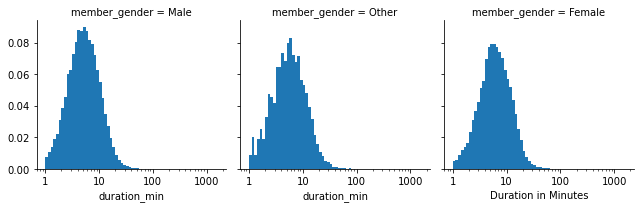

In [29]:
binsize = 0.05
bins = 10 ** np.arange(0,np.log10(bike.duration_min.max())+binsize,binsize)
g = sb.FacetGrid(data = bike, col = 'member_gender', col_wrap = 3, height = 3)
g.map(plt.hist,'duration_min',bins=bins,density=True)
plt.xscale('log')
plt.xticks([1,10,100,1000],['1','10','100','1000'])
plt.xlabel("Duration in Minutes")
plt.show();

The distribution seems to be the same for males and females in duration but it's slightly higher for Females

### Exploring the relationship between User Type and Trip Duration 

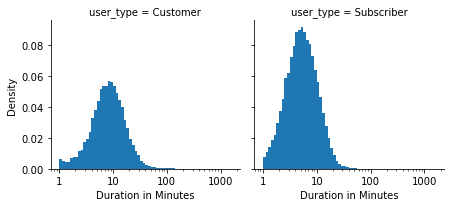

In [30]:
binsize = 0.05
bins = 10 ** np.arange(0,np.log10(bike.duration_min.max())+binsize,binsize)
g = sb.FacetGrid(data = bike, col = 'user_type', col_wrap = 3, height = 3)
g.map(plt.hist,'duration_min',bins=bins,density=True)
plt.xscale('log')
plt.xticks([1,10,100,1000],['1','10','100','1000'])
g.set_xlabels("Duration in Minutes")
g.set_ylabels("Density")
plt.show();

When comparing the distribution of the customers and subscribers it looks that customers have longer duration than subscribers

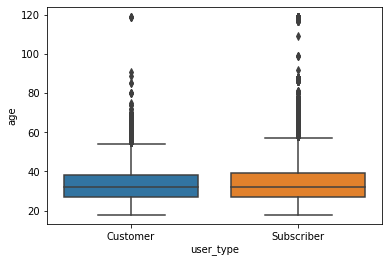

In [31]:
sb.boxplot(x="user_type",y="age",data=bike);

The distribution of age between Subscribers and customers looks similiar


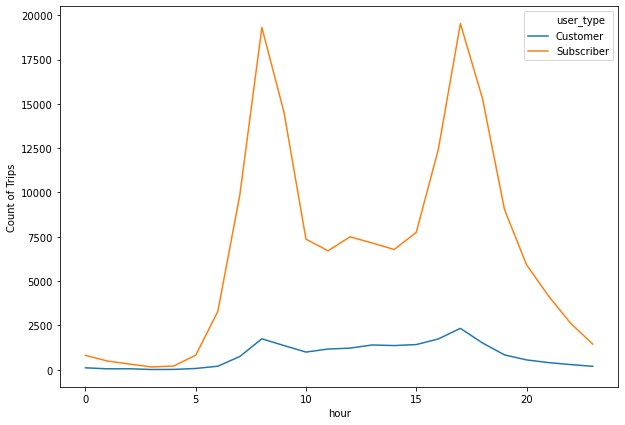

In [32]:
daily_count=bike.groupby(['hour','user_type']).duration_min.count()
daily_count = daily_count.reset_index()
plt.figure(figsize=(10,7))
sb.lineplot(data=daily_count,x='hour',y='duration_min',hue='user_type')
plt.ylabel('Count of Trips');

The customers looks to use the bike trips for going to work also but the curve is much more flat than the subscribers'. So that means they are mostly using bikes for other purposes.

### Exploring relationship between Age and Trip Duration

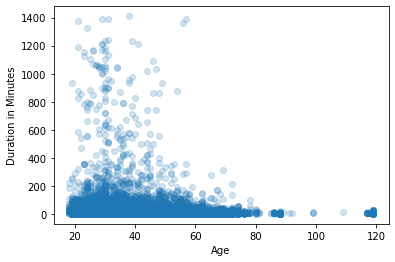

In [33]:
plt.scatter(data=bike,x='age',y='duration_min',alpha=0.2)
plt.xlabel('Age')
plt.ylabel("Duration in Minutes");

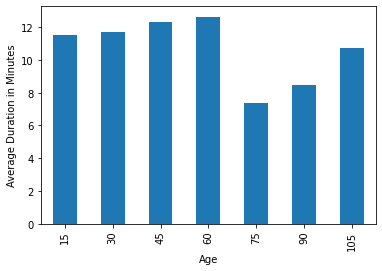

In [34]:
bins = np.arange(15,121,15)
bike['age_c']=pd.cut(bike.age,bins=bins,right = False,include_lowest = True,labels=bins[:-1])
bike.groupby('age_c').duration_min.mean().plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Average Duration in Minutes");

The Age vs duration in minutes shows that the mean is above 10 minutes for people younger than 75 and lower than 10 minutes for people older than 75.

Text(0, 0.5, 'Station Name')

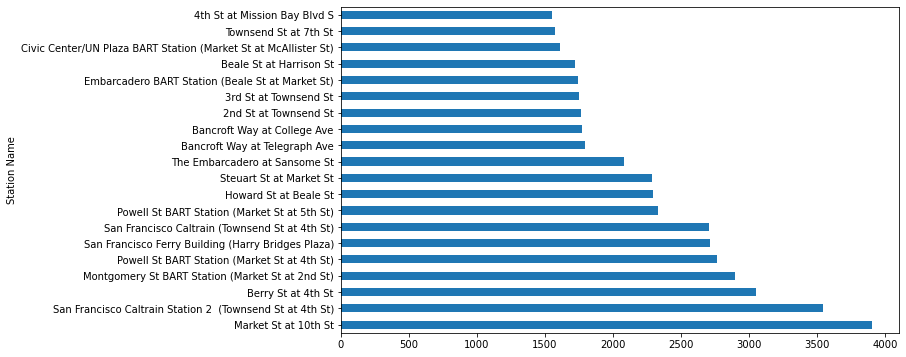

In [35]:
stations = bike.groupby('start_station_name').duration_min.count()
plt.figure(figsize=(10,6))
stations.sort_values(ascending = False)[:20].plot.barh();
plt.ylabel("Station Name")

looking at the top 20 stations shows that the difference the frequency across stations is huge. This is a side point from the main analysis but it worth mentioning that analyzing the stations to know which areas need more stations and which areas 
doesn't. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The duration time is higher from 2 to 4 AM daily.
- Age from 15 to 75 is counter the intuitive the average duration in minutes is higher when age is older but it decreases from older than 75 to 8 minutes.
- Customers seems to have higher average trip duration than subscribers
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The distribution of age is the same for subscribers and customers
- The peak time for the number of trips in the nonworking days is less than the number of trips in the working time in the working days

## Multivariate Exploration

In this part I want to explore the relationship between age, gender, time and trip duration and how those three variables combined can predict the trip duration

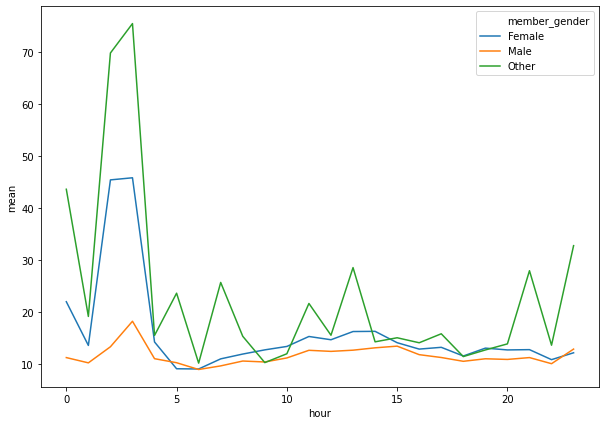

In [36]:
time_gender=bike.groupby(['hour','member_gender']).duration_min.mean()
time_gender = time_gender.reset_index()
plt.figure(figsize=(10,7))
sb.lineplot(data=time_gender,x='hour',y='duration_min',hue='member_gender')
plt.ylabel('mean');

The trip duration time of Females and other is higher than males and the difference is significant from 2 and 4 AM but as seen from the frequency plot that the number of trips in this time is very low so that might  make this conclusion not accurate.

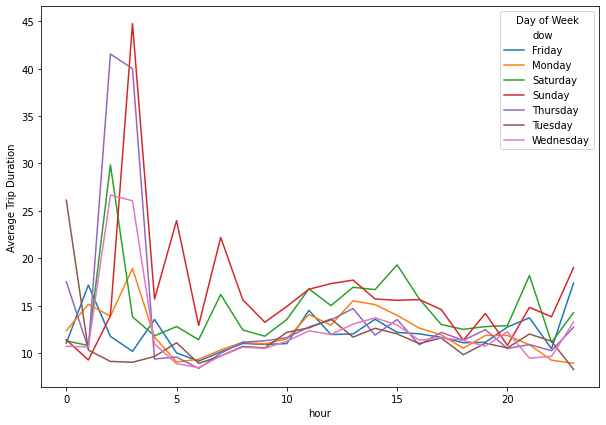

In [37]:
daily_count=bike.groupby(['hour','dow']).duration_min.mean()
daily_count = daily_count.reset_index()
daily_count = daily_count.sort_values ('dow',ascending = True)
plt.figure(figsize=(10,7))
sb.lineplot(data=daily_count,x='hour',y='duration_min',hue='dow')
plt.ylabel('Average Trip Duration')
plt.legend(title='Day of Week');

The week days shows smilar distribution but Thursday and Sunday shows a very high average between 2 and 4 AM

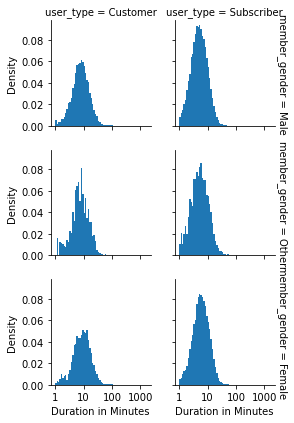

In [38]:
binsize = 0.05
bins = 10 ** np.arange(0,np.log10(bike.duration_min.max())+binsize,binsize)
g = sb.FacetGrid(data = bike, col = 'user_type',row = 'member_gender', height = 2,margin_titles=True)
g.map(plt.hist,'duration_min',bins=bins,density=True)
plt.xscale('log')
plt.xticks([1,10,100,1000],['1','10','100','1000'])
g.set_xlabels("Duration in Minutes")
g.set_ylabels("Density")
plt.show();

From the Chart above it looks that customers are having higher average trip time for all genders, but I need to check if this is the reason why females had higher trip duration than males.

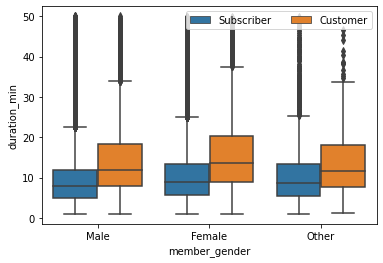

In [41]:
sb.boxplot(data=bike[bike.duration_min<50],x='member_gender',y='duration_min',hue='user_type')
plt.legend(loc=1,ncol=2);

After filtering the long tail it is shown clearly that the median of customers is higher subscribers but this graph also shows that the median for female customers is higher than male customers.

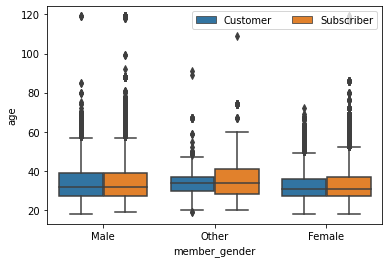

In [42]:
sb.boxplot(data=bike,x='member_gender',y='age',hue='user_type')
plt.legend(loc=1,ncol=2);

When checking if there are any difference in the distribution of age with different genders and user type, it looked nearly the same distribution but with more outliers in males subscribers and customers. Others have slightly higher average than males and females.

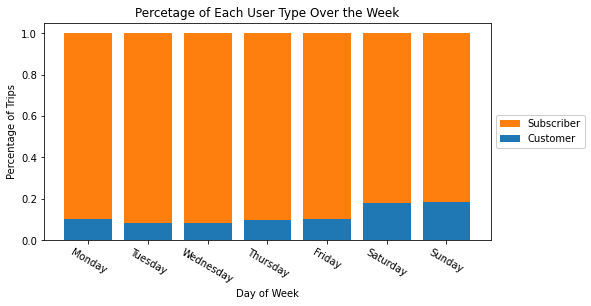

In [32]:
cat1_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cat2_order = ['Customer','Subscriber']

artists = [] # for storing references to plot elements
baselines = np.zeros(len(cat1_order))
cat1_counts = bike['dow'].value_counts()
plt.figure(figsize=(8,4))
for i in range(len(cat2_order)):
    cat2 = cat2_order[i]
    inner_counts = bike[bike['user_type'] == cat2]['dow'].value_counts()
    inner_props = inner_counts / cat1_counts
    bars = plt.bar(x = np.arange(len(cat1_order)),
                   height = inner_props[cat1_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order,rotation=-30)
plt.legend(reversed(artists), reversed(cat2_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6)
plt.ylabel("Percentage of Trips")
plt.xlabel('Day of Week')
plt.title("Percetage of Each User Type Over the Week");

We can see from the above chart that customers are nearly 20% in weekends while thet are nearly 10% in working days.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this part of the analysis I discovered that the high daily peak from 2 to 4 comes from genders females and others, and that happened particularly in days Sunday and Thursday. Ofcourse this might be a special case and no repeating pattern because the data covers only one month.
On the other hand when exploring the average duration time with gender and user type I found that the customers are the main reason why females average looks higher than males average while the subscriber males, females and others have nearly the same distribution.

### Were there any interesting or surprising interactions between features?

The fact that subscibers had lower duration time than customers was weird at the beginning but after investigating the data it was clear that the subscribers are mainly using the trips for work so they are not athletic people.

## Further Analysis Recommendations

- The locations of each station and the frequency of trips in each area
- Adding other data sources of other cities will allow further exploration